In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Prepropessing

In [2]:
df = pd.read_csv('챌린저_마스터_그마데이터(13_KR).csv')

In [3]:
dropcols = ['gameId', # no need columns
            'platformId', 'gameCreation', 'queueId', 'mapId', 'seasonId',
            'gameVersion', 'gameMode', 'gameType', 'teams', 'participants',
            'participantIdentities', 'teamId_blue','teamId_red', 'bans_blue', 'bans_red',
            'participantId_blue','playerScore0_blue','playerScore1_blue','playerScore2_blue','playerScore3_blue',
            'playerScore4_blue','playerScore5_blue','playerScore6_blue','playerScore7_blue','playerScore8_blue',
            'playerScore9_blue','perk0_blue','perk0Var1_blue','perk0Var2_blue','perk0Var3_blue','perk1_blue',
            'perk1Var1_blue','perk1Var2_blue','perk1Var3_blue','perk2_blue','perk2Var1_blue','perk2Var2_blue',
            'perk2Var3_blue','perk3_blue','perk3Var1_blue','perk3Var2_blue','perk3Var3_blue','perk4_blue',
            'perk4Var1_blue','perk4Var2_blue','perk4Var3_blue','perk5_blue','perk5Var1_blue','perk5Var2_blue',
            'perk5Var3_blue','perkPrimaryStyle_blue','perkSubStyle_blue','statPerk0_blue','statPerk1_blue',
            'statPerk2_blue','participantId_red','playerScore0_red','playerScore1_red','playerScore2_red',
            'playerScore3_red','playerScore4_red','playerScore5_red','playerScore6_red','playerScore7_red',
            'playerScore8_red','playerScore9_red','perk0_red','perk0Var1_red','perk0Var2_red','perk0Var3_red',
            'perk1_red','perk1Var1_red','perk1Var2_red','perk1Var3_red','perk2_red','perk2Var1_red','perk2Var2_red',
            'perk2Var3_red','perk3_red','perk3Var1_red','perk3Var2_red','perk3Var3_red','perk4_red','perk4Var1_red',
            'perk4Var2_red','perk4Var3_red','perk5_red','perk5Var1_red','perk5Var2_red','perk5Var3_red','perkPrimaryStyle_red',
            'perkSubStyle_red','statPerk0_red','statPerk1_red','statPerk2_red']

In [4]:
dropcols2=['doubleKills_blue', 'tripleKills_blue', 'quadraKills_blue','pentaKills_blue','unrealKills_blue','totalDamageDealt_blue',
           'magicDamageDealt_blue','physicalDamageDealt_blue','trueDamageDealt_blue','largestCriticalStrike_blue',
           'magicDamageDealtToChampions_blue','physicalDamageDealtToChampions_blue','trueDamageDealtToChampions_blue',
           'damageDealtToObjectives_blue','damageDealtToTurrets_blue','magicalDamageTaken_blue','physicalDamageTaken_blue',
           'trueDamageTaken_blue','neutralMinionsKilled_blue','neutralMinionsKilledEnemyJungle_blue',
           
           'doubleKills_red','tripleKills_red','quadraKills_red','pentaKills_red','unrealKills_red','totalDamageDealt_red',
           'magicDamageDealt_red','physicalDamageDealt_red','trueDamageDealt_red','largestCriticalStrike_red',
           'magicDamageDealtToChampions_red','physicalDamageDealtToChampions_red','trueDamageDealtToChampions_red',
           'damageDealtToObjectives_red','damageDealtToTurrets_red','magicalDamageTaken_red','physicalDamageTaken_red',
           'trueDamageTaken_red','neutralMinionsKilled_red','neutralMinionsKilledEnemyJungle_red'] # 다른 변수에 포함될 수 있는 변수들

In [5]:
df.drop(columns=dropcols, inplace=True)
df.drop(columns=dropcols2, inplace=True)

In [6]:
df

,gameDuration,win_blue,firstBlood_blue,firstTower_blue,firstInhibitor_blue,firstBaron_blue,firstDragon_blue,firstRiftHerald_blue,towerKills_blue,inhibitorKills_blue,...,totalTimeCrowdControlDealt_red,champLevel_red,visionWardsBoughtInGame_red,sightWardsBoughtInGame_red,wardsPlaced_red,wardsKilled_red,combatPlayerScore_red,objectivePlayerScore_red,totalPlayerScore_red,totalScoreRank_red
0,1264.0,Fail,False,False,False,False,False,False,0,0,...,282.0,47.0,17.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,1739.0,Win,False,False,True,True,False,False,9,2,...,693.0,49.0,19.0,0.0,57.0,22.0,0.0,0.0,0.0,0.0
2,1339.0,Win,True,True,True,True,True,True,8,1,...,309.0,45.0,12.0,0.0,30.0,10.0,0.0,0.0,0.0,0.0
3,2341.0,Win,True,True,True,True,False,True,11,5,...,1286.0,70.0,25.0,0.0,92.0,41.0,0.0,0.0,0.0,0.0
4,1479.0,Win,True,True,True,False,False,True,10,2,...,580.0,51.0,14.0,0.0,47.0,24.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22223,1623.0,Win,False,False,True,False,True,False,6,1,...,714.0,49.0,13.0,0.0,45.0,18.0,0.0,0.0,0.0,0.0
22224,1739.0,Win,False,False,True,True,False,False,7,1,...,1007.0,56.0,21.0,0.0,57.0,26.0,0.0,0.0,0.0,0.0
22225,1418.0,Fail,False,False,False,False,False,True,0,0,...,403.0,56.0,12.0,0.0,29.0,17.0,0.0,0.0,0.0,0.0
22226,901.0,Fail,False,False,False,False,False,False,0,0,...,495.0,37.0,5.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0


In [7]:
encoding = {'win_blue' : {'Win' : 1, 'Fail' : 0}}
df.replace(encoding, inplace=True)
df.dropna(inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
for i in range(2,8):
    le = LabelEncoder()
    y = list(df.iloc[:,i])
    
    le.fit(y)
    y2 = le.transform(y) 
    
    df.iloc[:,i] = y2

In [9]:
# 4드래곤 변수와 장로드래곤 변수 만듦

df['blue4dragons'] = 0 
df['red4dragons'] = 0
df['blue_olddragon'] = 0
df['red_olddragon'] = 0 

for i in range(0, df.shape[0]):
    blue_dragon = df['dragonKills_blue']
    if blue_dragon[i] == 4:
        df['blue4dragons'][i] = 1
    if blue_dragon[i] >= 5:
        df['blue_olddragon'][i] = blue_dragon[i]-4
    
for i in range(0, df.shape[0]):
    red_dragon = df['dragonKills_red']
    if blue_dragon[i] == 4:
        df['red4dragons'][i] = 1  
    if red_dragon[i] >= 5:
        df['red_olddragon'][i] = red_dragon[i]-4

# 양 팀에 모두 있는 연속형 변수를 그 차이를 나타내는 변수로 결합

df['gold_diff'] = df['goldEarned_blue'] - df['goldEarned_red']
df['level_diff'] = df['champLevel_blue'] - df['champLevel_red']
df['jg_gap'] = df['neutralMinionsKilledTeamJungle_blue'] - df['neutralMinionsKilledTeamJungle_red']
df['liner_gap'] = df['totalMinionsKilled_blue'] - df['totalMinionsKilled_red'] 
df['blue_kda'] = (df['kills_blue'] + df['assists_blue']) / (df['deaths_blue'] + 0.01)
df['red_kda'] = (df['kills_red'] + df['assists_red']) / (df['deaths_red'] + 0.01)

df['tower_gap'] = df['towerKills_blue'] - df['towerKills_red']
df['damage_gap'] = df['totalDamageDealtToChampions_blue'] - df['totalDamageDealtToChampions_red']
df['heal_gap'] = df['totalHeal_blue'] = df['totalHeal_red']
df['vision_gap'] = df['visionScore_blue'] - df['visionScore_red'] # vision score 변수에 다른 시야관련 변수들이 포함되어 있음

df = df.drop(['goldEarned_blue', 'goldEarned_red', 'champLevel_blue', 'champLevel_red',
              'neutralMinionsKilledTeamJungle_blue', 'neutralMinionsKilledTeamJungle_red', 'totalMinionsKilled_blue',
              'totalMinionsKilled_red', 'towerKills_blue', 'towerKills_red', 'totalHeal_blue', 'totalHeal_red', 'visionScore_blue',
              'visionScore_red', 'wardsKilled_blue', 'wardsKilled_red', 'kills_blue', 'assists_blue', 'deaths_blue',
               'kills_red', 'assists_red', 'deaths_red', 'wardsKilled_blue', 'wardsKilled_red',
        
        
                  'vilemawKills_red',  # 우리 데이터에는 없는 오브젝트
                  'vilemawKills_blue',
                  'dominionVictoryScore_blue', # all zero
                  'dominionVictoryScore_red',  # all zero
              
                  'totalUnitsHealed_red', ### totalHeal 변수에 포함
                  'totalUnitsHealed_blue',
                  'damageSelfMitigated_blue',
                  'damageSelfMitigated_red',
              
                  'turretKills_blue', # turret = tower 라고 함
                  'turretKills_red',
                  'visionWardsBoughtInGame_blue', 
                  'sightWardsBoughtInGame_blue', # all zero
                  'wardsPlaced_blue', 
                  'firstBloodKill_blue', # all zero
                  'firstTowerKill_blue', # all zero
                  'turretKills_red', # turret = tower
                  'visionWardsBoughtInGame_red', 
                  'sightWardsBoughtInGame_red', # all zero
                  'wardsPlaced_red',
             
             
                  'firstBloodAssist_blue', # all zero
                  'combatPlayerScore_blue', # all zero
                  'objectivePlayerScore_blue', # all zero
                  'totalPlayerScore_blue', # all zero
                  'totalScoreRank_blue', # all zero
                  'combatPlayerScore_red', # all zero
                  'objectivePlayerScore_red', # all zero
                  'totalPlayerScore_red', # all zero
                  'totalScoreRank_red'], axis = 1)

<ipython-input-9-cc1517e1617e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blue4dragons'][i] = 1
<ipython-input-9-cc1517e1617e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blue_olddragon'][i] = blue_dragon[i]-4
<ipython-input-9-cc1517e1617e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['red4dragons'][i] = 1
<ipython-input-9-cc1517e1617e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [10]:
df

,gameDuration,win_blue,firstBlood_blue,firstTower_blue,firstInhibitor_blue,firstBaron_blue,firstDragon_blue,firstRiftHerald_blue,inhibitorKills_blue,baronKills_blue,...,gold_diff,level_diff,jg_gap,liner_gap,blue_kda,red_kda,tower_gap,damage_gap,heal_gap,vision_gap
0,1264.0,0,0,0,0,0,0,0,0,0,...,4875.0,19.0,113.0,-43.0,1.598934,3.566334,-8,7081.0,14613.0,21.0
1,1739.0,1,0,0,1,1,0,0,2,1,...,25245.0,35.0,5.0,360.0,3.688383,1.874219,4,61372.0,20495.0,52.0
2,1339.0,1,1,1,1,1,1,1,1,1,...,26983.0,30.0,92.0,77.0,3.213138,1.034126,6,34012.0,16338.0,51.0
3,2341.0,1,1,1,1,1,0,1,5,1,...,33849.0,32.0,-21.0,442.0,3.588823,2.699100,7,51731.0,38048.0,110.0
4,1479.0,1,1,1,1,0,0,1,2,0,...,31767.0,30.0,48.0,336.0,3.665556,1.435529,9,75380.0,19774.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22223,1623.0,1,0,0,1,0,1,0,1,0,...,26757.0,31.0,-5.0,393.0,3.958417,1.117318,3,38658.0,23248.0,73.0
22224,1739.0,1,0,0,1,1,0,0,1,1,...,28812.0,35.0,-35.0,403.0,3.109959,1.453885,3,40559.0,16043.0,37.0
22225,1418.0,0,0,0,0,0,0,1,0,0,...,3594.0,17.0,2.0,3.0,1.418275,5.073021,-10,1325.0,27123.0,51.0
22226,901.0,0,0,0,0,0,0,0,0,0,...,657.0,5.0,-23.0,-11.0,1.239504,5.158070,-7,11581.0,5794.0,-5.0


# VIF

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(columns=['gameDuration', 'win_blue'])
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.sort_values(by='VIF Factor', ascending=False)

# 변수들간의 상관관계 존재

/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
18,inf,totalDamageDealtToChampions_blue
36,inf,red4dragons
35,inf,blue4dragons
30,inf,totalDamageDealtToChampions_red
46,inf,damage_gap
20,371.965744,totalDamageTaken_blue
21,338.817946,goldSpent_blue
32,218.679486,totalDamageTaken_red
33,212.813856,goldSpent_red
39,146.853861,gold_diff


In [12]:
from factor_analyzer import FactorAnalyzer

df1 = df.iloc[:, 2:] # with 'first' columns
df2 = df.iloc[:, 16:] # without 'first' columns

df1_train, df1_test = train_test_split(df1, test_size=0.25, random_state=1234)
df2_train, df2_test = train_test_split(df2, test_size=0.25, random_state=1234)

In [13]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(df2_train)
chi_square_value, p_value # 차원축소를 할 통계적 유의성이 존재

/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:118: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

# Factor Analysis

In [14]:
from factor_analyzer import FactorAnalyzer

df_train, df_test = train_test_split(df, test_size = 0.25, random_state = 77)

fx_train, fy_train = df_train.iloc[:, 2:], df_train.win_blue
fx_test, fy_test = df_test.iloc[:, 2:], df_test.win_blue

In [15]:
#fa = FactorAnalyzer(n_factors=5, method="ml", rotation="promax")
#fa.fit(df[items])

fa1 = FactorAnalyzer(n_factors=25, method='ml', rotation='varimax')
fa1.fit(fx_train)
# Check Eigenvalues
ev1, v1 = fa1.get_eigenvalues()
sum(ev1>1)

/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:417: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) -
/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:536: UserWarning: Failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn('Failed to converge: {}'.format(res.message))


10

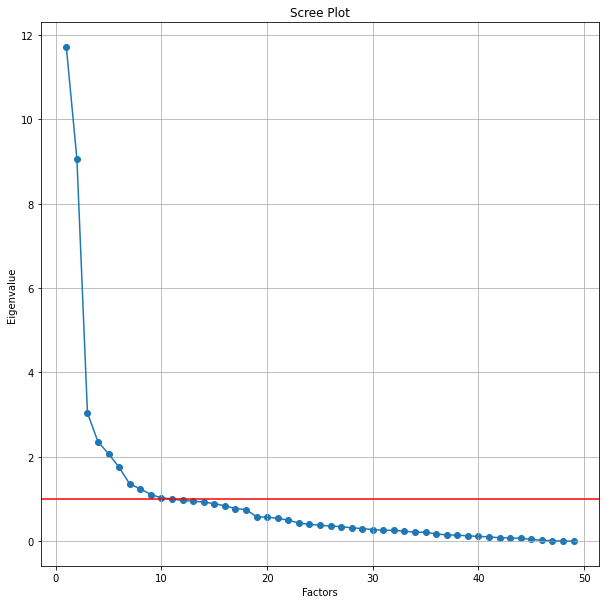

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(range(1,df1.shape[1]+1),ev1)
plt.plot(range(1,df1.shape[1]+1),ev1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')
plt.grid()
plt.show()

/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:417: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) -
/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:536: UserWarning: Failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn('Failed to converge: {}'.format(res.message))


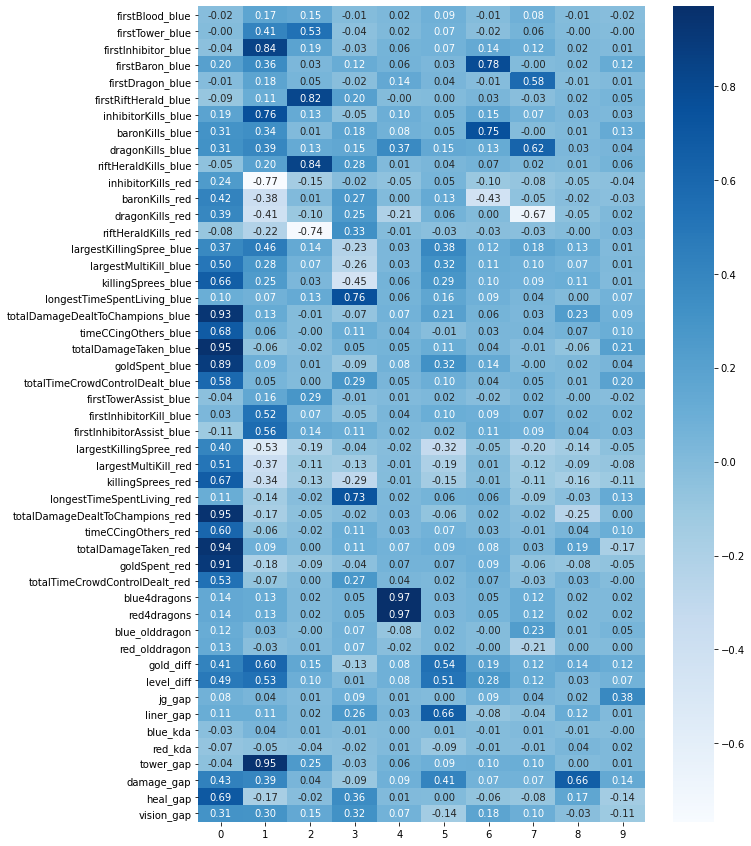

In [17]:
fa1 = FactorAnalyzer(n_factors=10, method='ml', rotation='varimax')
fa1.fit(fx_train)
efa_result= pd.DataFrame(fa1.loadings_, index=fx_train.columns)

plt.figure(figsize=(10,15))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [18]:
fa_score1 = pd.DataFrame(fa1.transform(fx_train))
fa_score1['win_blue'] = fy_train.ravel()
fa_score11_train = fa_score1.copy() # first가 포함된 열까지 efa 한 factor score

In [19]:
fa_score11_train

,0,1,2,3,4,5,6,7,8,9,win_blue
0,264.847875,-314.816659,189.334454,222.634454,746.074217,136.133717,-222.772742,-17.180577,-29.269045,-22.193973,1
1,-180.540104,224.401439,-408.757186,-41.613174,-140.982290,-200.000391,642.285104,47.640344,80.443174,-7.860721,0
2,182.070464,-203.767986,357.384760,381.482947,582.286420,564.865674,-1099.719829,-74.236160,-292.730186,52.223386,1
3,-261.201335,-264.178328,445.052647,57.104182,209.317949,397.007643,298.290262,-16.022556,-58.209542,-51.905728,0
4,-42.471432,151.148572,-114.174956,25.087528,134.649417,-163.247855,373.695331,35.438480,83.056336,-31.707186,0
...,...,...,...,...,...,...,...,...,...,...,...
16666,403.306032,37.809005,-266.743850,-121.050173,1024.423636,-60.634709,511.628471,49.583361,192.921611,-44.472872,1
16667,-266.956029,-131.134475,181.824420,52.092982,-314.065941,133.644154,310.391893,-15.490204,-56.223857,-3.233829,0
16668,246.475756,-384.780739,490.146508,808.304286,709.377927,438.710317,-1726.993423,-87.512235,-368.735600,64.380618,1
16669,-1135.143613,1783.056698,-1453.810560,-524.436039,-3826.717224,-1113.823381,1688.955748,192.956613,414.057506,137.739402,1


In [20]:
fa_score11_test = pd.DataFrame(fa1.transform(fx_test))
fa_score11_test['win_blue'] = fy_test.ravel()

In [21]:
fa_score11_test

,0,1,2,3,4,5,6,7,8,9,win_blue
0,-1361.077623,261.952041,-3241.616700,-1024.580847,-4273.088667,-2891.351758,2105.541244,20.130750,806.003098,-60.342169,1
1,132.825739,179.878742,-285.491427,250.092981,994.587074,-335.995211,540.346259,66.438123,260.813830,-90.220219,1
2,-1762.550599,597.667655,-1702.619359,-1366.567804,-983.064366,-3406.264982,-1180.121404,58.793123,945.671238,-14.818372,0
3,195.026859,166.592338,-137.638268,-118.466271,97.561368,-186.591456,410.908179,37.187569,89.359242,-29.704203,0
4,190.597660,-381.097743,555.792837,299.455296,86.516590,506.317253,-600.421903,-50.857741,-143.149746,47.139933,1
...,...,...,...,...,...,...,...,...,...,...,...
5552,-87.096383,-237.787930,477.606821,37.693694,46.184295,430.230832,-58.601526,-9.253627,-15.460557,-18.009686,0
5553,521.738621,-315.769232,1009.763306,211.622411,233.842257,697.491362,-209.402889,-55.800409,-83.178686,-3.000894,1
5554,476.862755,-65.954575,884.893732,212.851249,143.865453,1083.217404,-113.551147,-42.984391,-233.778737,13.318116,0
5555,572.976849,-230.010148,1483.882462,534.670509,1363.679942,922.628964,-1879.344674,-47.060409,-122.926969,1.545638,1


In [22]:
fax_train, fay_train = fa_score11_train.drop(columns=['win_blue']), fa_score11_train['win_blue']
fax_test, fay_test = fa_score11_test.drop(columns=['win_blue']), fa_score11_test['win_blue']

# Random Forest

## reduced features

In [20]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [0, 100, 150, 200],
           'max_depth' : [0, 5, 10, 15, 20],
           'min_samples_leaf' : [0, 5, 10, 15, 20],
           'min_samples_split' : [0, 5, 10, 15, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(fax_train, fay_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
최고 예측 정확도: 0.9142


In [38]:
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=150, random_state=628)
rf_clf.fit(fax_train, fay_train)

predicted = rf_clf.predict(fax_test)
accuracy = accuracy_score(fay_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.909


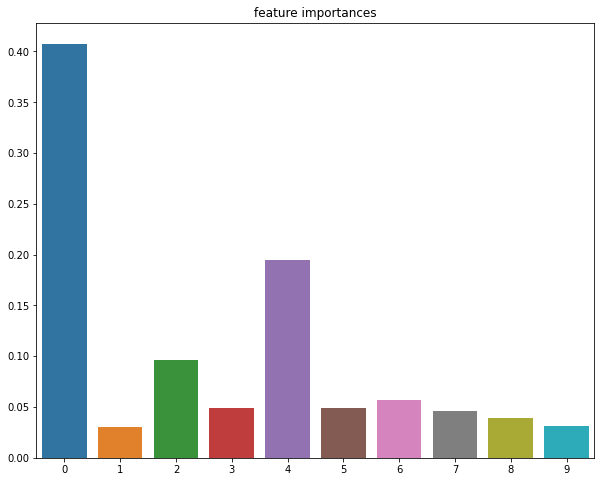

In [20]:
feature_importances = rf_clf.feature_importances_

ft_importances=pd.Series(feature_importances, index = fax_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize = (10,8))
plt.title('feature importances')
sns.barplot(x=ft_importances.index, y = ft_importances)
plt.show()

In [98]:
ft_importances

1    0.241679
4    0.219895
7    0.096872
2    0.083522
6    0.082571
0    0.076792
9    0.066430
5    0.049857
8    0.044525
3    0.037856
dtype: float64

## All features

In [25]:
df1_train_target = df.loc[df1_train.index].win_blue
df1_test_target = df.loc[df1_test.index].win_blue

df2_train_target = df.loc[df2_train.index].win_blue
df2_test_target = df.loc[df2_test.index].win_blue

In [26]:
X_train, y_train = df1_train, df1_train_target
X_test, y_test = df1_test, df1_test_target

In [56]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [0, 100, 150, 200],
           'max_depth' : [0, 5, 10, 15, 20],
           'min_samples_leaf' : [0, 5, 10, 15, 20],
           'min_samples_split' : [0, 5, 10, 15, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}
최고 예측 정확도: 0.9841


In [201]:
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100, random_state=628)
rf_clf.fit(X_train, y_train)

predicted = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.986


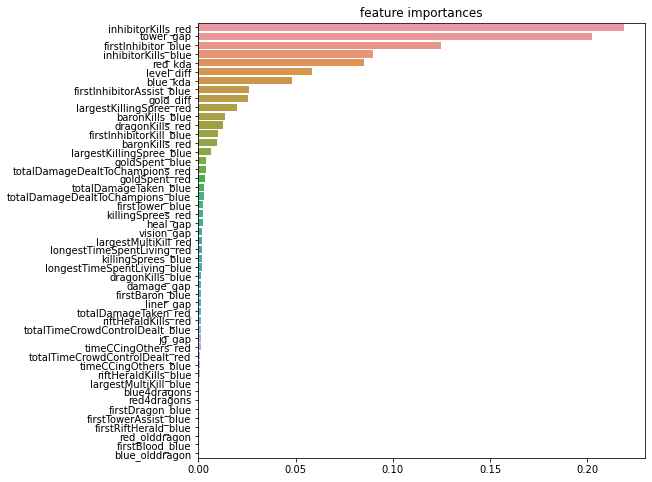

In [202]:
feature_importances = rf_clf.feature_importances_

ft_importances=pd.Series(feature_importances, index = X_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize = (8,8))
plt.title('feature importances')
sns.barplot(x=ft_importances, y = ft_importances.index)
plt.show()

In [203]:
ft_importances

inhibitorKills_red                  0.218679
tower_gap                           0.202635
firstInhibitor_blue                 0.124618
inhibitorKills_blue                 0.089709
red_kda                             0.084935
level_diff                          0.058542
blue_kda                            0.048017
firstInhibitorAssist_blue           0.026215
gold_diff                           0.025740
largestKillingSpree_red             0.019956
baronKills_blue                     0.013862
dragonKills_red                     0.012618
firstInhibitorKill_blue             0.009902
baronKills_red                      0.009656
largestKillingSpree_blue            0.006254
goldSpent_blue                      0.003878
totalDamageDealtToChampions_red     0.003797
goldSpent_red                       0.003507
totalDamageTaken_blue               0.002620
totalDamageDealtToChampions_blue    0.002615
firstTower_blue                     0.002560
killingSprees_red                   0.002303
heal_gap  

# Logistic Regression

## Reduced features

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression(penalty='l2', solver='newton-cg')
log_reg.fit(fax_train, fay_train)
 
y_pred = log_reg.predict(fax_test)
print('정확도 :', metrics.accuracy_score(fay_test, y_pred))

정확도 : 0.8787115350008997


In [228]:
coef = log_reg.coef_.reshape(-1)

print(coef.shape)

for feature, w in sorted(enumerate(abs(coef)), key=lambda x:-x[1])[:100]:
    print(fax_train.columns[feature], end=' ')
    print(w)

(10,)
1 3.6275743569162584
2 2.767818150583771
5 1.1268699347585311
4 0.4929856294040196
9 0.3923533763483382
6 0.24236185777598665
0 0.2392719844299108
7 0.22637551598010913
3 0.12832428640050814
8 0.09072521032743729


In [229]:
coef

array([-0.23927198,  3.62757436,  2.76781815,  0.12832429,  0.49298563,
        1.12686993, -0.24236186,  0.22637552, -0.09072521, -0.39235338])

## All features

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression(penalty='l2', solver='newton-cg')
log_reg.fit(X_train, y_train)
 
y_pred = log_reg.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.9867296446243815


/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [232]:
coef = log_reg.coef_.reshape(-1)

print(coef.shape)

for feature, w in sorted(enumerate(abs(coef)), key=lambda x:-x[1])[:100]:
    print(X_train.columns[feature], end=' ')
    print(w)

(49,)
tower_gap 0.7977881977422636
level_diff 0.33219663216211
red_kda 0.27411484634027555
largestMultiKill_red 0.1753622185114295
inhibitorKills_blue 0.12203284176396688
inhibitorKills_red 0.11709813964451182
blue_kda 0.10856161527385377
dragonKills_blue 0.10110126701879801
largestKillingSpree_red 0.08906932806735701
dragonKills_red 0.08757900928564669
killingSprees_red 0.08753659969845481
largestMultiKill_blue 0.06746627647445036
riftHeraldKills_blue 0.06284785180120502
riftHeraldKills_red 0.04943139487874378
firstRiftHerald_blue 0.04719713201791035
firstTower_blue 0.04226472267779128
largestKillingSpree_blue 0.03117309351771416
firstInhibitorAssist_blue 0.03071374089218462
killingSprees_blue 0.029910264961187972
firstBaron_blue 0.027244290132303298
firstTowerAssist_blue 0.026074295931760482
blue4dragons 0.025098879360759628
red4dragons 0.025098879360759628
baronKills_red 0.022256404118339332
firstBlood_blue 0.014004793491368064
firstInhibitor_blue 0.013557174825490164
baronKills_blu

# Support Vector Machine

## Reduced Features

In [254]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

def plot_coefficients(classifier, feature_names, top_features=6):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.9239888423988842


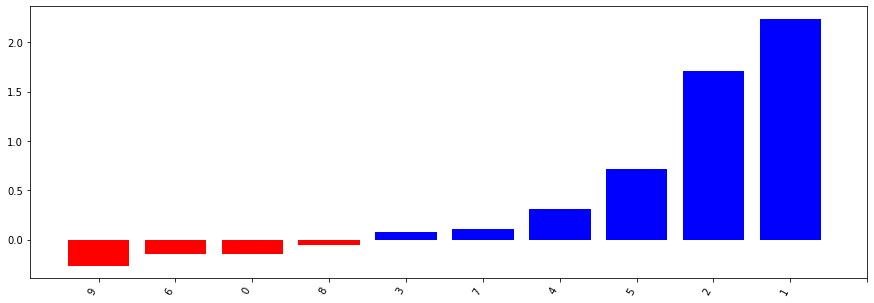

In [255]:
plot_coefficients(svm, X_train.columns, top_features = 5)

## All Features

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.9641893107791975


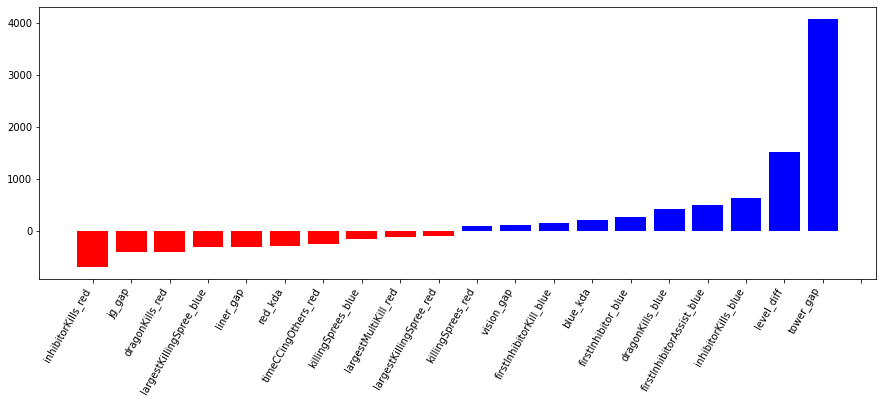

In [29]:
def plot_coefficients(classifier, feature_names, top_features=6):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
plot_coefficients(svm, X_train.columns, top_features = 10)

# Case Studey

## Per game Duration

In [149]:
short_game, long_game = df.loc[(df['gameDuration'] > 60*15) & (df['gameDuration'] < 60*25)], df.loc[df['gameDuration'] > 60*30]

In [150]:
print(short_game.shape)
print(long_game.shape)

(8522, 51)
(5733, 51)


In [152]:
short_df = short_game.iloc[:, 2:]
short_df_target = short_game['win_blue']

long_df = long_game.iloc[:, 2:]
long_df_target = long_game['win_blue']

In [160]:
short_df_train, short_df_test = train_test_split(short_df, test_size = 0.25, random_state = 77)
long_df_train, long_df_test = train_test_split(long_df, test_size = 0.25, random_state = 77)

short_df_train_target = short_game.loc[short_df_train.index].win_blue
short_df_test_target = short_game.loc[short_df_test.index].win_blue

long_df_train_target, long_df_test_target = long_game.loc[long_df_train.index].win_blue, long_game.loc[long_df_test.index].win_blue

### Short Games

In [158]:
#fa = FactorAnalyzer(n_factors=5, method="ml", rotation="promax")
#fa.fit(df[items])

fa1 = FactorAnalyzer(n_factors=25, method='ml', rotation='varimax')
fa1.fit(short_df_train)
# Check Eigenvalues
ev1, v1 = fa1.get_eigenvalues()
sum(ev1>1)

/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:417: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) -
/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:536: UserWarning: Failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn('Failed to converge: {}'.format(res.message))


10

In [161]:
fa1 = FactorAnalyzer(n_factors=10, method='ml', rotation='varimax')
fa1.fit(short_df_train)

/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:417: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) -
/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:536: UserWarning: Failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn('Failed to converge: {}'.format(res.message))


FactorAnalyzer(method='ml', n_factors=10, rotation='varimax',
               rotation_kwargs={})

In [163]:
fa_score1 = pd.DataFrame(fa1.transform(short_df_train))
fa_score1['win_blue'] = short_df_train_target.ravel()
fa_score11_train = fa_score1.copy() # first가 포함된 열까지 efa 한 factor score

In [164]:
fa_score11_test = pd.DataFrame(fa1.transform(short_df_test))
fa_score11_test['win_blue'] = short_df_test_target.ravel()

In [166]:
X_train, y_train = fa_score11_train.drop(columns=['win_blue']), fa_score11_train['win_blue']
X_test, y_test = fa_score11_test.drop(columns=['win_blue']), fa_score11_test['win_blue']

In [167]:
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=150, random_state=628)
rf_clf.fit(X_train, y_train)

predicted = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.98


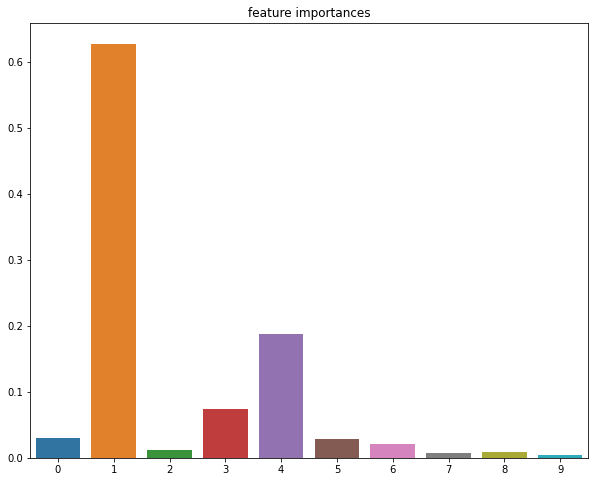

In [168]:
feature_importances = rf_clf.feature_importances_

ft_importances=pd.Series(feature_importances, index = X_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize = (10,8))
plt.title('feature importances')
sns.barplot(x=ft_importances.index, y = ft_importances)
plt.show()

In [183]:
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=150, random_state=628)
rf_clf.fit(short_df_train, short_df_train_target)

predicted = rf_clf.predict(short_df_test)
accuracy = accuracy_score(short_df_test_target, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.99


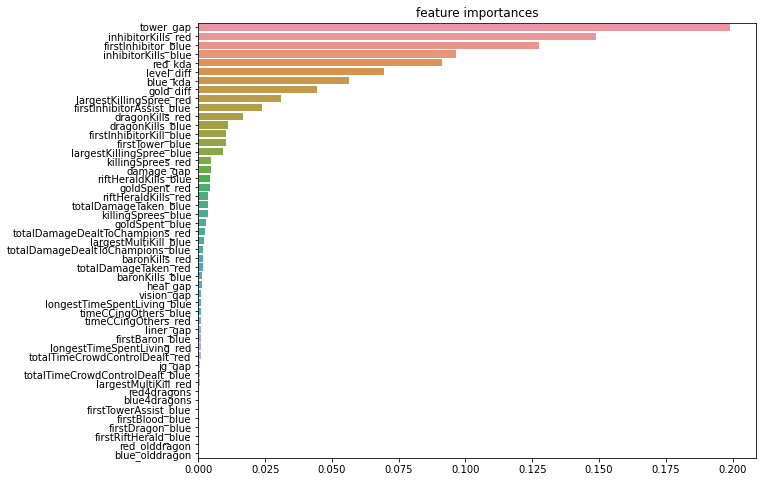

In [186]:
feature_importances = rf_clf.feature_importances_

ft_importances=pd.Series(feature_importances, index = short_df_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize = (10,8))
plt.title('feature importances')
sns.barplot(x=ft_importances, y = ft_importances.index)
plt.show()

### Long Games

In [189]:
fa1 = FactorAnalyzer(n_factors=10, method='ml', rotation='varimax')
fa1.fit(long_df_train)

/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:417: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) -
/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:536: UserWarning: Failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  warnings.warn('Failed to converge: {}'.format(res.message))


FactorAnalyzer(method='ml', n_factors=10, rotation='varimax',
               rotation_kwargs={})

In [190]:
fa_score1 = pd.DataFrame(fa1.transform(long_df_train))
fa_score1['win_blue'] = long_df_train_target.ravel()
fa_score11_train = fa_score1.copy() # first가 포함된 열까지 efa 한 factor score

In [191]:
fa_score11_test = pd.DataFrame(fa1.transform(long_df_test))
fa_score11_test['win_blue'] = long_df_test_target.ravel()

In [192]:
X_train, y_train = fa_score11_train.drop(columns=['win_blue']), fa_score11_train['win_blue']
X_test, y_test = fa_score11_test.drop(columns=['win_blue']), fa_score11_test['win_blue']

In [193]:
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=150, random_state=628)
rf_clf.fit(X_train, y_train)

predicted = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.916


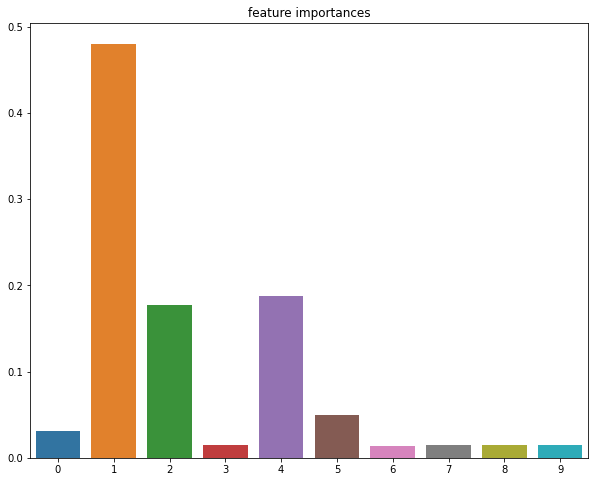

In [195]:
feature_importances = rf_clf.feature_importances_

ft_importances=pd.Series(feature_importances, index = X_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize = (10,8))
plt.title('feature importances')
sns.barplot(x=ft_importances.index, y = ft_importances)
plt.show()

In [196]:
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=150, random_state=628)
rf_clf.fit(long_df_train, long_df_train_target)

predicted = rf_clf.predict(long_df_test)
accuracy = accuracy_score(long_df_test_target, predicted)

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.964


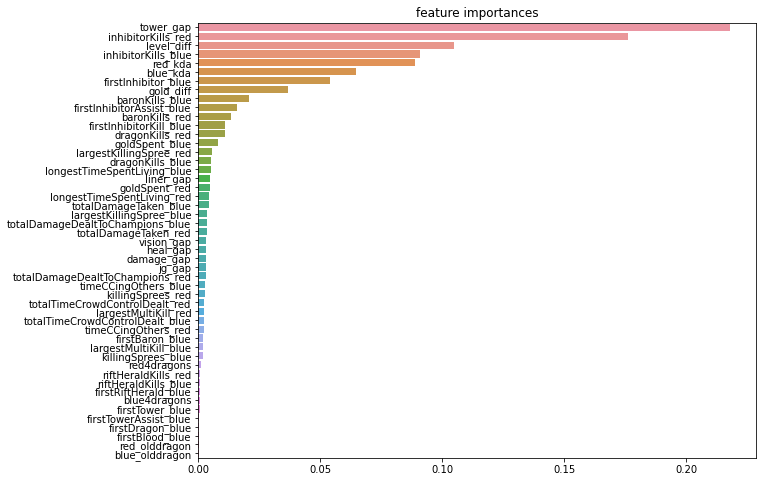

In [197]:
feature_importances = rf_clf.feature_importances_

ft_importances=pd.Series(feature_importances, index = long_df_train.columns)
ft_importances = ft_importances.sort_values(ascending=False)

plt.figure(figsize = (10,8))
plt.title('feature importances')
sns.barplot(x=ft_importances, y = ft_importances.index)
plt.show()